## Analyse et nettoyage

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [57]:
df = pd.read_csv("datasets/arbres_grenoble.csv", sep=",")
df["anneedeplantation"].isnull().any()

True

In [58]:
df

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
0,27452,ESP29627,AR29627,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP991,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,Libre,Ville de Grenoble,Tige,Libre,"45.18599541005583,5.736390702744254"
1,27458,ESP29628,AR29628,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP22,...,NaN,NaN,Ville de Grenoble,NaN,Plus de 20 m,Libre,Ville de Grenoble,NaN,Libre,"45.18535720117796,5.737112737684537"
2,27461,ESP29629,AR29629,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP22,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,Libre,Ville de Grenoble,NaN,Libre,"45.185699673347614,5.7377442387742645"
3,27467,ESP29630,AR29630,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP843,...,NaN,NaN,Ville de Grenoble,NaN,Moins de 10 m,Libre,Ville de Grenoble,NaN,Libre,"45.184868969286526,5.7364435192678584"
4,27470,ESP29631,AR29631,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP614,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,Libre,Ville de Grenoble,Tige,Libre,"45.18493170028907,5.734850190386917"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31774,27517,ESP27738,AR27738,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP714,...,NaN,NaN,Ville de Grenoble,NaN,Moins de 10 m,Libre,Ville de Grenoble,NaN,Libre,"45.183034220591935,5.735577673559971"
31775,27519,ESP27739,AR27739,VEG,VEGETATION,ESP01,Arbre,ESP187,Bois semi naturel,ESP31659,...,NaN,NaN,Ville de Grenoble,NaN,Plus de 20 m,Libre,Ville de Grenoble,NaN,Libre,"45.18351698514722,5.735315763957461"
31776,27521,ESP27740,AR27740,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP203,...,NaN,NaN,Ville de Grenoble,NaN,Plus de 20 m,Libre,Ville de Grenoble,NaN,Libre,"45.18437975945701,5.735769288203197"
31777,27523,ESP27741,AR27741,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP320,...,NaN,NaN,Grenoble Alpes Métropole,NaN,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Tige,Semi-libre,"45.167433401965766,5.741630980486011"


In [59]:
df = df.dropna(subset=['anneedeplantation'])
df["anneedeplantation"].isnull().any()

False

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29817 entries, 0 to 31778
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   elem_point_id          29817 non-null  int64  
 1   code                   29817 non-null  object 
 2   nom                    29817 non-null  object 
 3   genre                  29817 non-null  object 
 4   genre_desc             29817 non-null  object 
 5   categorie              29817 non-null  object 
 6   categorie_desc         29817 non-null  object 
 7   sous_categorie         29817 non-null  object 
 8   sous_categorie_desc    29817 non-null  object 
 9   code_parent            29817 non-null  object 
 10  code_parent_desc       29817 non-null  object 
 11  adr_secteur            29817 non-null  int64  
 12  bien_reference         29817 non-null  object 
 13  genre_bota             29792 non-null  object 
 14  espece                 28446 non-null  object 
 15  variete

In [61]:
df.describe()

,elem_point_id,adr_secteur,equipe,anneedeplantation,courrier,identifiantplu,anneeabattage,essouchement,diametrearbre,causeabattage
count,29817.000000,29817.000000,0.0,29817.000000,0.0,594.000000,0.0,0.0,0.0,0.0
mean,19166.919744,267.824899,NaN,1990.082034,NaN,88.008418,NaN,NaN,NaN,NaN
std,11847.289690,3165.297197,NaN,17.974221,NaN,60.919693,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1900.000000,NaN,2.000000,NaN,NaN,NaN,NaN
25%,9193.000000,2.000000,NaN,1975.000000,NaN,67.000000,NaN,NaN,NaN,NaN
50%,18507.000000,4.000000,NaN,1987.000000,NaN,70.000000,NaN,NaN,NaN,NaN
75%,27826.000000,5.000000,NaN,2006.000000,NaN,70.000000,NaN,NaN,NaN,NaN
max,47645.000000,38421.000000,NaN,2022.000000,NaN,358.000000,NaN,NaN,NaN,NaN


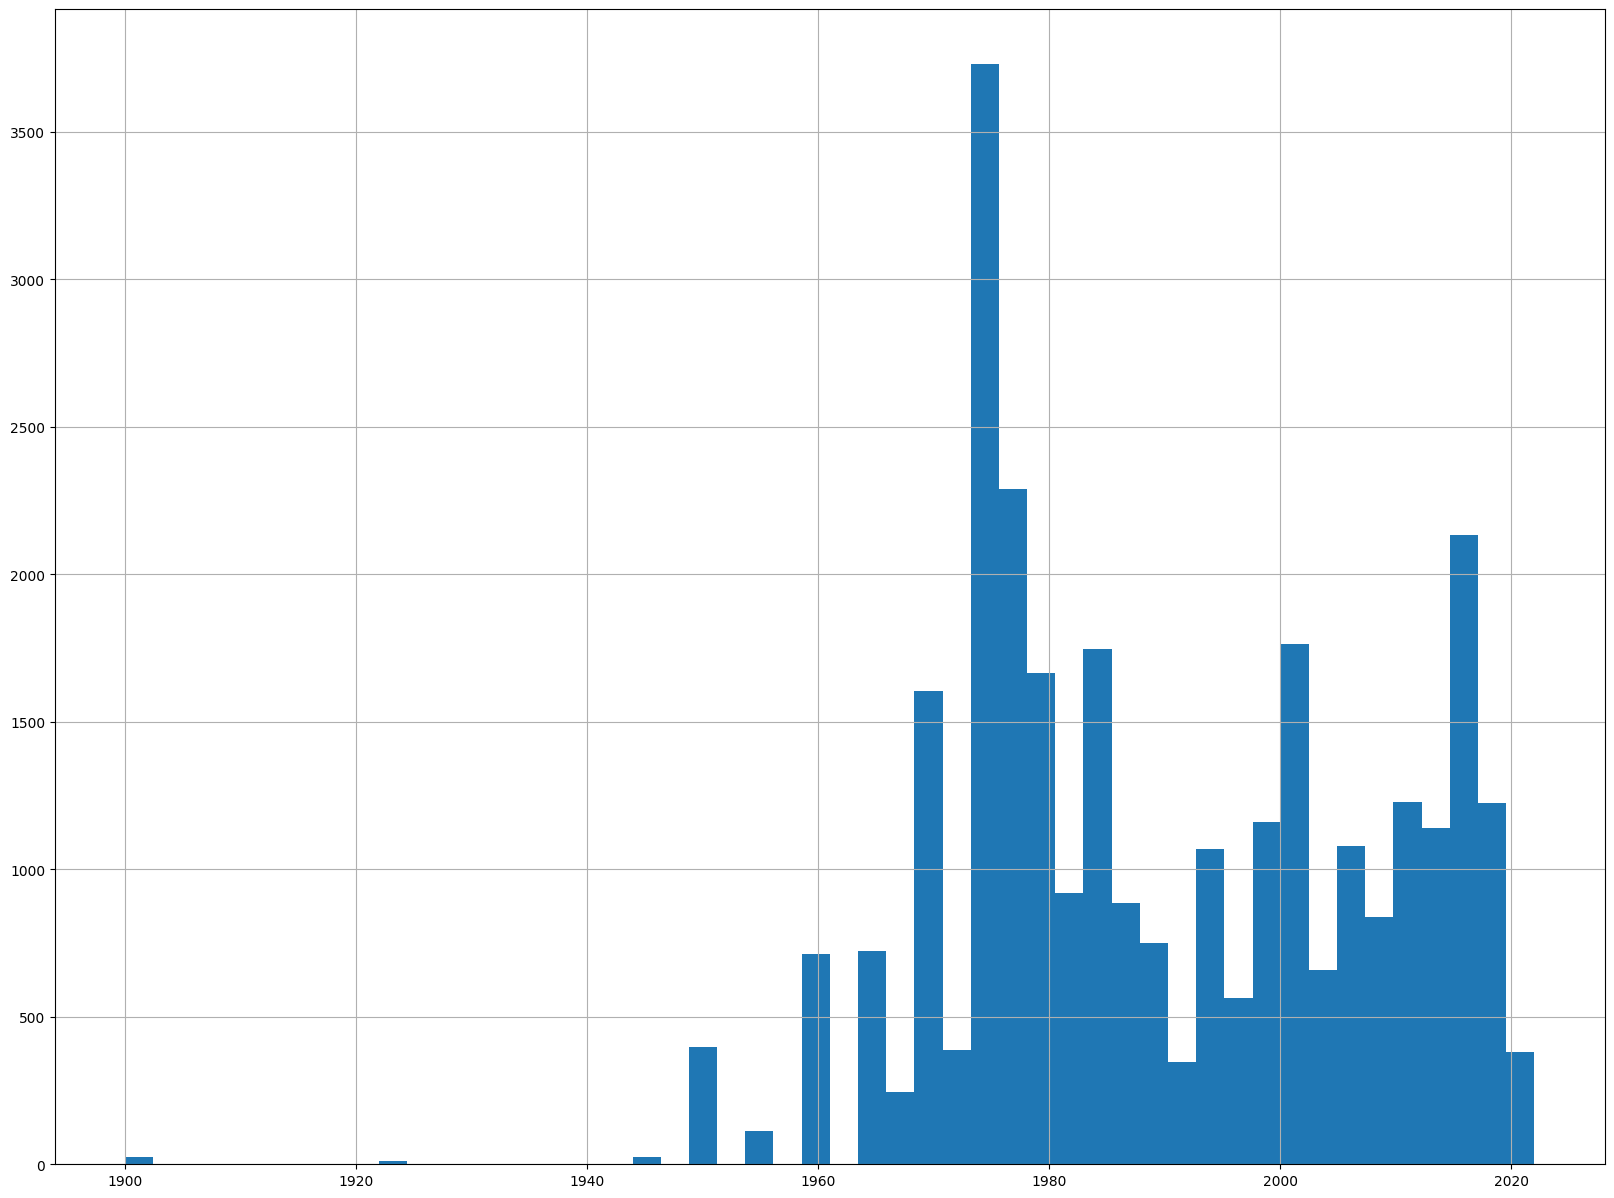

In [62]:
df["anneedeplantation"].hist(bins=50, figsize=(20,15))
plt.show()

In [63]:
seuil = 0.8 * len(df)
df = df.dropna(axis=1, thresh=seuil)

In [64]:
count_unique = df.nunique()
colonnes_to_del = count_unique[count_unique == 1].index
df = df.drop(columns=colonnes_to_del)

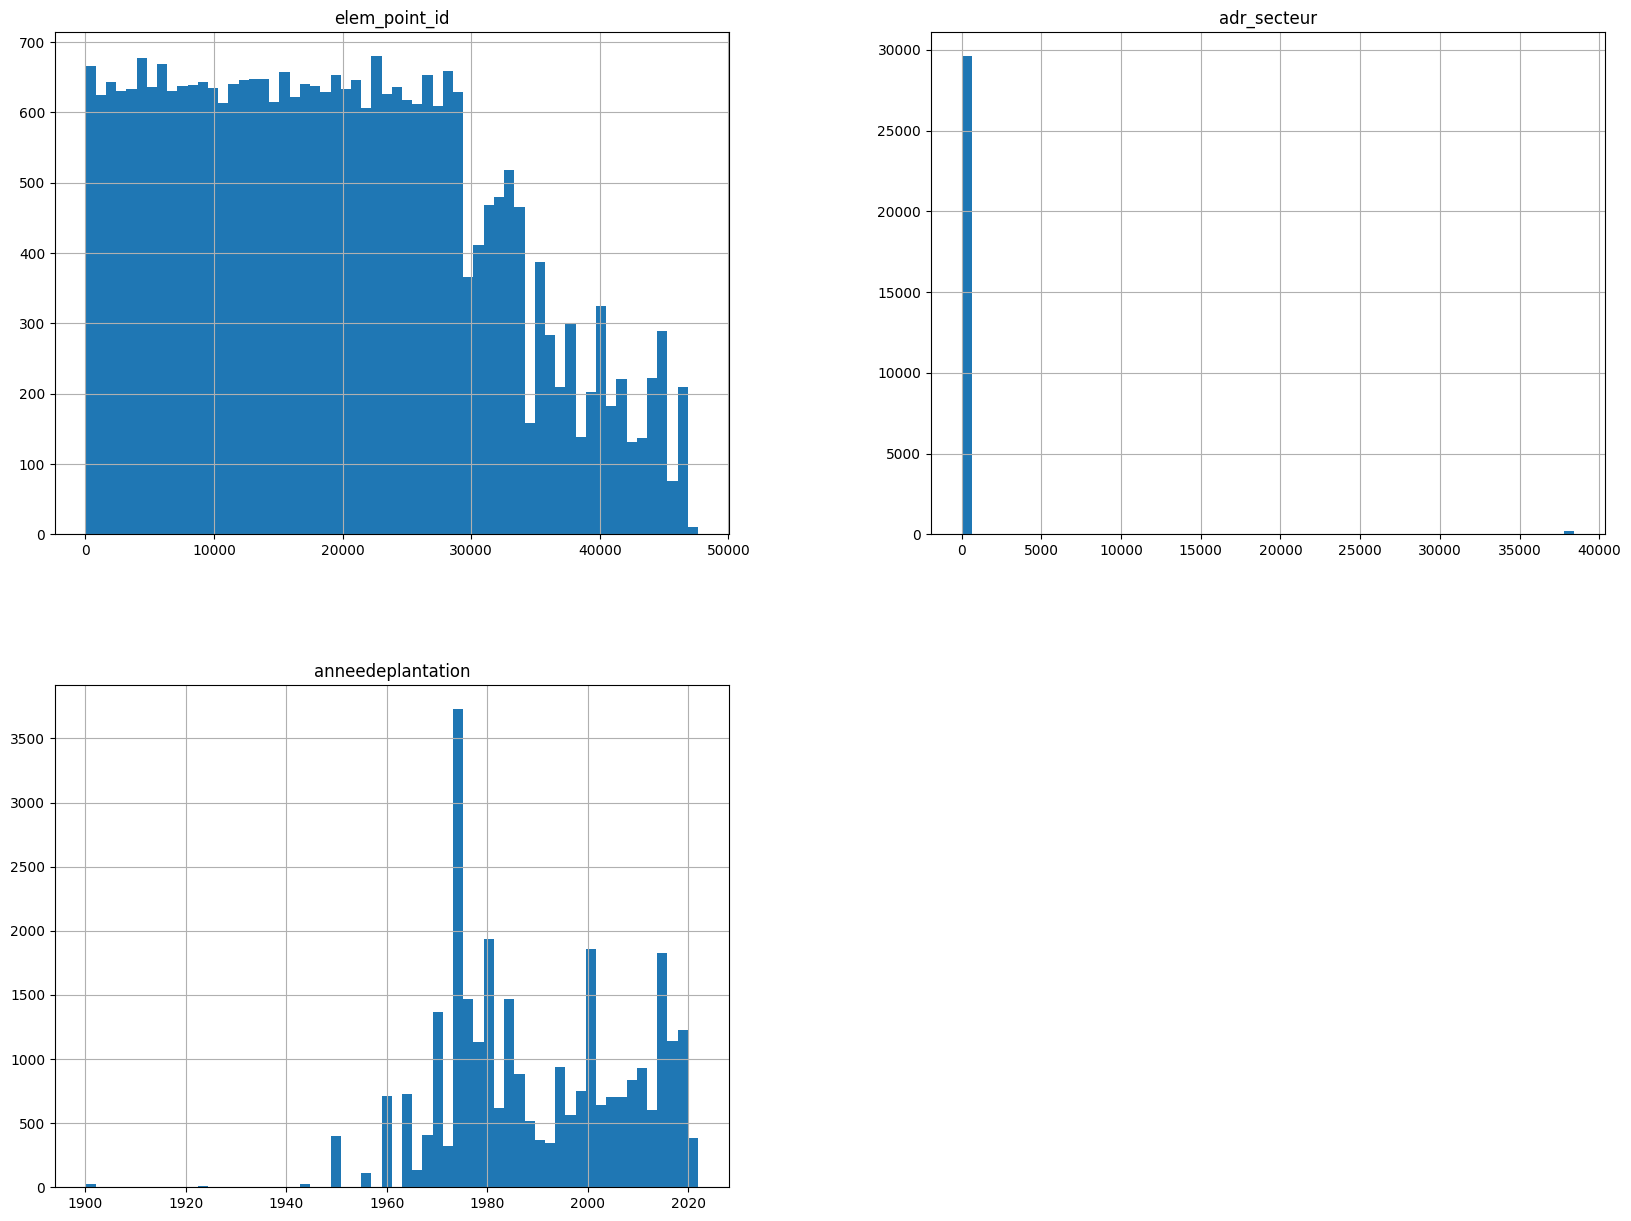

In [65]:
df.hist(bins=60, figsize=(20,15))
plt.show()

In [66]:
df = df.drop(['elem_point_id', 'code', 'nom', 'sous_categorie', "code_parent", "bien_reference", "code_parent_desc", "genre_bota", "espece", "structure"], axis=1)

In [67]:
df['lat'] = df['geo_point_2d'].str.split(',').str[0]
df['lon'] = df['geo_point_2d'].str.split(',').str[1]

df['lat'] = pd.to_numeric(df['lat'])
df['lon'] = pd.to_numeric(df['lon'])

df = df.drop('geo_point_2d', axis=1)
df

,sous_categorie_desc,adr_secteur,stadededeveloppement,anneedeplantation,collectivite,lat,lon
0,Arbre d'espaces ouverts,5,Arbre adulte,1965.0,Ville de Grenoble,45.185995,5.736391
1,Arbre d'espaces ouverts,5,Arbre adulte,1965.0,Ville de Grenoble,45.185357,5.737113
2,Arbre d'espaces ouverts,5,Arbre vieillissant,1965.0,Ville de Grenoble,45.185700,5.737744
3,Arbre d'espaces ouverts,5,Arbre vieillissant,1965.0,Ville de Grenoble,45.184869,5.736444
4,Arbre d'espaces ouverts,5,Arbre adulte,1965.0,Ville de Grenoble,45.184932,5.734850
...,...,...,...,...,...,...,...
31774,Arbre d'espaces ouverts,5,Arbre adulte,1970.0,Ville de Grenoble,45.183034,5.735578
31775,Bois semi naturel,5,Arbre adulte,1997.0,Ville de Grenoble,45.183517,5.735316
31776,Arbre d'espaces ouverts,5,Arbre adulte,1960.0,Ville de Grenoble,45.184380,5.735769
31777,Arbre de voirie,5,Arbre adulte,1979.0,Grenoble Alpes Métropole,45.167433,5.741631


<Axes: xlabel='lon', ylabel='lat'>

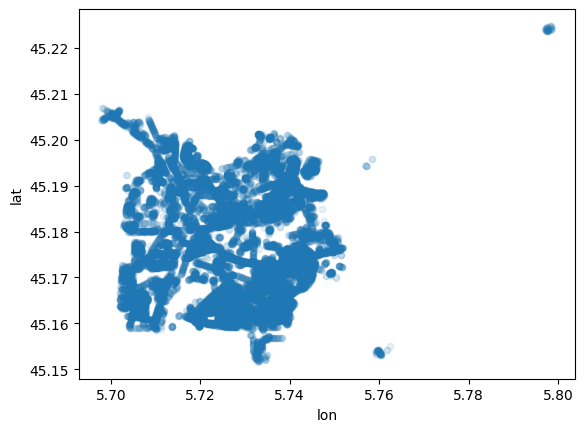

In [68]:
df.plot(kind="scatter", x="lon", y="lat", alpha=0.1)

In [69]:
df = df.dropna(how="any")

## Save pickle

In [70]:
chemin_fichier_pickle = 'pickle/df_arbres_grenoble.pkl'

df.to_pickle(chemin_fichier_pickle)

df_charge = pd.read_pickle(chemin_fichier_pickle)
df_charge

,sous_categorie_desc,adr_secteur,stadededeveloppement,anneedeplantation,collectivite,lat,lon
0,Arbre d'espaces ouverts,5,Arbre adulte,1965.0,Ville de Grenoble,45.185995,5.736391
1,Arbre d'espaces ouverts,5,Arbre adulte,1965.0,Ville de Grenoble,45.185357,5.737113
2,Arbre d'espaces ouverts,5,Arbre vieillissant,1965.0,Ville de Grenoble,45.185700,5.737744
3,Arbre d'espaces ouverts,5,Arbre vieillissant,1965.0,Ville de Grenoble,45.184869,5.736444
4,Arbre d'espaces ouverts,5,Arbre adulte,1965.0,Ville de Grenoble,45.184932,5.734850
...,...,...,...,...,...,...,...
31774,Arbre d'espaces ouverts,5,Arbre adulte,1970.0,Ville de Grenoble,45.183034,5.735578
31775,Bois semi naturel,5,Arbre adulte,1997.0,Ville de Grenoble,45.183517,5.735316
31776,Arbre d'espaces ouverts,5,Arbre adulte,1960.0,Ville de Grenoble,45.184380,5.735769
31777,Arbre de voirie,5,Arbre adulte,1979.0,Grenoble Alpes Métropole,45.167433,5.741631


## Split data

In [71]:
X = df.drop("anneedeplantation", axis=1)
y = df["anneedeplantation"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X.isnull().any()

sous_categorie_desc     False
adr_secteur             False
stadededeveloppement    False
collectivite            False
lat                     False
lon                     False
dtype: bool

## Pipeline

In [74]:
X_cat = ["sous_categorie_desc", "stadededeveloppement", "collectivite", "adr_secteur"]
X_num = ["lon", "lat"]

In [75]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('numeric', Pipeline([
#             ('imputer', SimpleImputer(strategy='mean')),
#             ('scaler', StandardScaler())
#         ]), X_num),
#         ('categorical', Pipeline([
#             ('imputer', SimpleImputer(strategy='most_frequent')),
#             ('onehot', OneHotEncoder())
#         ]), X_cat)
#     ])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('scaler', StandardScaler())
        ]), X_num),
        ('categorical', Pipeline([
            ('onehot', OneHotEncoder())
        ]), X_cat)
    ])

In [76]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('linear_regression', LinearRegression())
])

In [77]:
X_train

,sous_categorie_desc,adr_secteur,stadededeveloppement,collectivite,lat,lon
8961,Arbre de voirie,2,Arbre adulte,Grenoble Alpes Métropole,45.196031,5.717603
3343,Arbre d'espaces ouverts,2,Arbre adulte,Ville de Grenoble,45.193094,5.736904
25115,Arbre de voirie,1,Arbre adulte,Grenoble Alpes Métropole,45.187297,5.712556
5715,Arbre d'espaces ouverts,3,Arbre adulte,Ville de Grenoble,45.163357,5.705514
27693,Arbre de voirie,1,Arbre jeune,Grenoble Alpes Métropole,45.180132,5.707758
...,...,...,...,...,...,...
23167,Arbre d'espaces ouverts,5,Arbre adulte,Ville de Grenoble,45.189171,5.740732
6415,Arbre de voirie,5,Arbre jeune,Ville de Grenoble,45.187841,5.747588
1271,Arbre d'enceintes fermées,2,Arbre adulte,Ville de Grenoble,45.193480,5.734186
16838,Bois semi naturel,3,Arbre jeune,Ville de Grenoble,45.162459,5.706162


## Train Model

In [78]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lon', 'lat']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sous_categorie_desc',
                                                   'stadededeveloppement',
                                                   'collectivite',
                                                   'adr_secteur'])])),
                ('linear_regression', LinearRegression())])

## Prediction

In [79]:
y_pred = pipeline.predict(X_test)
print(y_test)
y_pred

15184    1950.0
25153    2000.0
4864     1987.0
3927     1990.0
23132    1980.0
          ...  
3636     1995.0
28252    2001.0
4307     2005.0
3658     1980.0
21199    2001.0
Name: anneedeplantation, Length: 5509, dtype: float64


array([1972.73294061, 1990.81773862, 1984.72748568, ..., 1984.26393933,
       1983.33727712, 1980.80636855])

## Evaluation

In [80]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 195.65398305228774


In [81]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 13.987636792978567


In [82]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 10.94684406486043


## Même chose mais avec un RandomForest

In [83]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lon', 'lat']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sous_categorie_desc',
                                                   'stadededeveloppement',
                                                   'collectivite',
                                                   'adr_secteur'])])),
                ('random_forest', RandomForestRegressor(random_state=42))])

In [84]:
y_pred = pipeline.predict(X_test)
print(y_test)
y_pred

15184    1950.0
25153    2000.0
4864     1987.0
3927     1990.0
23132    1980.0
          ...  
3636     1995.0
28252    2001.0
4307     2005.0
3658     1980.0
21199    2001.0
Name: anneedeplantation, Length: 5509, dtype: float64


array([1955.06, 2000.  , 1987.  , ..., 1991.48, 1980.36, 1980.48])

In [85]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 48.59280929388272
Root Mean Squared Error: 6.970854272891001
Mean Absolute Error: 2.914597930658918


## Même chose avec Nearest Neighbors

In [86]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=2))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lon', 'lat']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sous_categorie_desc',
                                                   'stadededeveloppement',
                                                   'collectivite',
                                                   'adr_secteur'])])),
                ('knn', KNeighborsRegressor(n_neighbors=2))])

In [87]:
y_pred = pipeline.predict(X_test)
print(y_test)
y_pred

15184    1950.0
25153    2000.0
4864     1987.0
3927     1990.0
23132    1980.0
          ...  
3636     1995.0
28252    2001.0
4307     2005.0
3658     1980.0
21199    2001.0
Name: anneedeplantation, Length: 5509, dtype: float64


array([1985.5, 2000. , 1987. , ..., 2005. , 1982.5, 1980. ])

In [88]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 46.629606099110546
Root Mean Squared Error: 6.828587416084717
Mean Absolute Error: 2.165547286258849


## Grid Search

In [89]:
param_grid = [
    {'n_estimators': [3, 10, 30, 100, 192], 'max_features': [2, 3, 4, 5, 6]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 100, 192], 'max_features': [2, 3, 4, 5, 6]},
  ]


In [90]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

X_train_pre = pipeline.fit_transform(X_train)

estimator = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_pre, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 3, 4, 5, 6],
                          'n_estimators': [3, 10, 30, 100, 192]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 5, 6],
                          'n_estimators': [3, 10, 100, 192]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [91]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 192}

In [92]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.150076,0.003077,0.003188,0.000062,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-76.178918,-75.392058,-76.354209,-75.975062,0.418411,40,-19.346872,-19.476119,-19.265567,-19.362853,0.086697
1,0.501637,0.005442,0.008573,0.000095,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-63.797211,-61.862302,-63.467234,-63.042249,0.845154,29,-11.380438,-10.975987,-10.999778,-11.118735,0.185307
2,1.503917,0.005522,0.024184,0.000073,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-61.515525,-57.419848,-58.986395,-59.307256,1.687376,14,-8.760538,-8.492149,-8.728037,-8.660241,0.119597
3,5.035069,0.012765,0.079575,0.000149,2,100,NaN,"{'max_features': 2, 'n_estimators': 100}",-58.992605,-56.396701,-57.616989,-57.668765,1.060405,9,-7.979239,-7.767065,-7.919622,-7.888642,0.089347
4,9.653829,0.022109,0.150872,0.000322,2,192,NaN,"{'max_features': 2, 'n_estimators': 192}",-59.087670,-56.282631,-57.104157,-57.491486,1.177449,8,-7.849313,-7.639547,-7.789679,-7.759513,0.088253
5,0.154768,0.001479,0.003163,0.000040,3,3,NaN,"{'max_features': 3, 'n_estimators': 3}",-77.713586,-77.110582,-78.296589,-77.706919,0.484208,45,-19.958105,-18.810882,-20.176790,-19.648592,0.599041
6,0.509939,0.001617,0.008515,0.000027,3,10,NaN,"{'max_features': 3, 'n_estimators': 10}",-65.022693,-63.285240,-64.273996,-64.193976,0.711565,31,-11.279945,-11.183610,-11.436447,-11.300001,0.104190
7,1.521398,0.013803,0.024070,0.000271,3,30,NaN,"{'max_features': 3, 'n_estimators': 30}",-61.482649,-58.576564,-58.171663,-59.410292,1.474672,15,-8.704878,-8.616541,-8.609533,-8.643650,0.043389
8,5.088006,0.033756,0.079480,0.000510,3,100,NaN,"{'max_features': 3, 'n_estimators': 100}",-59.567870,-56.656407,-56.978936,-57.734404,1.303125,10,-7.984046,-7.826734,-7.881630,-7.897470,0.065192
9,9.769776,0.052881,0.150915,0.001264,3,192,NaN,"{'max_features': 3, 'n_estimators': 192}",-58.990749,-56.493375,-56.815538,-57.433221,1.109164,6,-7.843174,-7.659518,-7.756648,-7.753113,0.075019


## Random Search

In [93]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=6),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train_pre, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f0b67c80dd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f0b67c3c390>},
                   random_state=42, scoring='neg_mean_squared_error')

In [94]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=192, random_state=42)

## Random Forest Regressor avec les meilleures hyperparamètres

In [95]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor(n_estimators=192, max_features=6, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lon', 'lat']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sous_categorie_desc',
                                                   'stadededeveloppement',
                                                   'collectivite',
                                                   'adr_secteur'])])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, n_estimators=192,
                                       random_state=42))])

In [96]:
y_pred = pipeline.predict(X_test)
print(y_test)
y_pred

15184    1950.0
25153    2000.0
4864     1987.0
3927     1990.0
23132    1980.0
          ...  
3636     1995.0
28252    2001.0
4307     2005.0
3658     1980.0
21199    2001.0
Name: anneedeplantation, Length: 5509, dtype: float64


array([1979.00520833, 1999.52083333, 1987.        , ..., 2002.77083333,
       1981.86458333, 1982.28125   ])

In [97]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 48.22400930525783
Root Mean Squared Error: 6.944350891570632
Mean Absolute Error: 3.116556768037584


## Prédiction de nouvelles données

In [98]:
data = {
    'sous_categorie_desc': ['Arbre d\'espaces ouverts', 'Bois semi naturel', 'Arbre de voirie', 'Arbre d\'espaces ouverts', 'Arbre de voirie', 'Bois semi naturel', 'Arbre de voirie', 'Arbre d\'enceintes fermées', 'Arbre de voirie', 'Arbre d\'espaces ouverts'],
    'adr_secteur': [3, 1, 5, 2, 4, 3, 1, 2, 5, 4],
    'stadededeveloppement': ['Arbre adulte', 'Arbre jeune', 'Arbre jeune', 'Arbre adulte', 'Arbre adulte', 'Arbre adulte', 'Arbre jeune', 'Arbre adulte', 'Arbre jeune', 'Arbre adulte'],
    'collectivite': ['Ville de Grenoble', 'Ville de Grenoble', 'Grenoble Alpes Métropole', 'Grenoble Alpes Métropole', 'Ville de Grenoble', 'Ville de Grenoble', 'Grenoble Alpes Métropole', 'Ville de Grenoble', 'Grenoble Alpes Métropole', 'Ville de Grenoble'],
    'lat': [45.165432, 45.178903, 45.190765, 45.198432, 45.171234, 45.160987, 45.185678, 45.192345, 45.175432, 45.199876],
    'lon': [5.725432, 5.732456, 5.749012, 5.714567, 5.727890, 5.745678, 5.703456, 5.736543, 5.710987, 5.724567]
}

df = pd.DataFrame(data)

df_gen = pd.DataFrame(data)
df_gen

,sous_categorie_desc,adr_secteur,stadededeveloppement,collectivite,lat,lon
0,Arbre d'espaces ouverts,3,Arbre adulte,Ville de Grenoble,45.165432,5.725432
1,Bois semi naturel,1,Arbre jeune,Ville de Grenoble,45.178903,5.732456
2,Arbre de voirie,5,Arbre jeune,Grenoble Alpes Métropole,45.190765,5.749012
3,Arbre d'espaces ouverts,2,Arbre adulte,Grenoble Alpes Métropole,45.198432,5.714567
4,Arbre de voirie,4,Arbre adulte,Ville de Grenoble,45.171234,5.727890
5,Bois semi naturel,3,Arbre adulte,Ville de Grenoble,45.160987,5.745678
6,Arbre de voirie,1,Arbre jeune,Grenoble Alpes Métropole,45.185678,5.703456
7,Arbre d'enceintes fermées,2,Arbre adulte,Ville de Grenoble,45.192345,5.736543
8,Arbre de voirie,5,Arbre jeune,Grenoble Alpes Métropole,45.175432,5.710987
9,Arbre d'espaces ouverts,4,Arbre adulte,Ville de Grenoble,45.199876,5.724567


In [99]:
y_pred = pipeline.predict(df_gen)
y_pred

array([1980.203125  , 1998.31770833, 2000.55729167, 1984.05208333,
       1979.48958333, 1990.44270833, 2014.25      , 1989.03125   ,
       2005.93229167, 1981.08854167])

In [100]:
df_gen["annedeplantation"] = y_pred
df_gen["annedeplantation"] = df_gen["annedeplantation"].round()
df_gen

,sous_categorie_desc,adr_secteur,stadededeveloppement,collectivite,lat,lon,annedeplantation
0,Arbre d'espaces ouverts,3,Arbre adulte,Ville de Grenoble,45.165432,5.725432,1980.0
1,Bois semi naturel,1,Arbre jeune,Ville de Grenoble,45.178903,5.732456,1998.0
2,Arbre de voirie,5,Arbre jeune,Grenoble Alpes Métropole,45.190765,5.749012,2001.0
3,Arbre d'espaces ouverts,2,Arbre adulte,Grenoble Alpes Métropole,45.198432,5.714567,1984.0
4,Arbre de voirie,4,Arbre adulte,Ville de Grenoble,45.171234,5.727890,1979.0
5,Bois semi naturel,3,Arbre adulte,Ville de Grenoble,45.160987,5.745678,1990.0
6,Arbre de voirie,1,Arbre jeune,Grenoble Alpes Métropole,45.185678,5.703456,2014.0
7,Arbre d'enceintes fermées,2,Arbre adulte,Ville de Grenoble,45.192345,5.736543,1989.0
8,Arbre de voirie,5,Arbre jeune,Grenoble Alpes Métropole,45.175432,5.710987,2006.0
9,Arbre d'espaces ouverts,4,Arbre adulte,Ville de Grenoble,45.199876,5.724567,1981.0
